TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

Overview

* In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).
Dataset

* The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:

      •	Text: The content of the blog post. Column name: Data
      •	Category: The category to which the blog post belongs.
      * Column name: Labels

Tasks

1. Data Exploration and Preprocessing

      •	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

      •	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

      •	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

2. Naive Bayes Model for Text Classification

      •	Split the data into training and test sets.

      •	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

      •	Train the model on the training set and make predictions on the test set.

3. Sentiment Analysis

      •	Choose a suitable library or method for performing sentiment analysis on the blog post texts.

      •	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

      •	Examine the distribution of sentiments across different categories and summarize your findings.

4. Evaluation

      •	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

      •	Discuss the performance of the model and any challenges encountered during the classification process.

      •	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.



In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/blogs.csv'
blogs_data = pd.read_csv(file_path)

# Display the first few rows and dataset info
blogs_data_info = blogs_data.info()
blogs_data_head = blogs_data.head()

print("Dataset Info:")
print(blogs_data_info)

print("\nFirst Few Rows of the Dataset:")
print(blogs_data_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
Dataset Info:
None

First Few Rows of the Dataset:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


### Data Preprocessing & Tokenization and TF-IDF feature extraction


In [2]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

In [3]:
# Download stopwords from nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Define a function for preprocessing the text
def preprocess_text(text):
    # Remove newsgroup-related metadata (e.g., 'Path:', 'Newsgroups:', etc.)
    text = re.sub(r'Newsgroups:.*', '', text)
    text = re.sub(r'Path:.*', '', text)
    text = re.sub(r'Xref:.*', '', text)

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

In [5]:
# Apply the preprocessing function to the 'Data' column
blogs_data['cleaned_data'] = blogs_data['Data'].apply(preprocess_text)

# Show the first few rows of the cleaned data
blogs_data[['Data', 'cleaned_data']].head()

,Data,cleaned_data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,frankdsuucp frank odwyer subject islamic genoc...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,bilokcforumosrheedu bill conner subject omni m...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,jimhcarsonuwashingtonedu james hogan subject y...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,jbrownbatmanbmdtrwcom subject death penalty gu...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,eczcawmipsnottacuk cwainwright subject rawlins...


feature extraction using TF-IDF

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Apply TF-IDF vectorization on the cleaned data
X = tfidf_vectorizer.fit_transform(blogs_data['cleaned_data']).toarray()

# Labels (target) for classification
y = blogs_data['Labels']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((1600, 5000), (400, 5000))

## Naive Bayes Model for Text Classification
Train and Evaluate the Naive Bayes Model

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [9]:
# Initialize the Naive Bayes model
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [10]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
y_pred.shape


(400,)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7375
Precision: 0.7459080280901254
Recall: 0.7375
F1 Score: 0.7295224914723137
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.61      0.78      0.68        18
 comp.os.ms-windows.misc       0.74      0.77      0.76        22
comp.sys.ibm.pc.hardware       0.75      0.60      0.67        25
   comp.sys.mac.hardware       0.65      0.52      0.58        21
          comp.windows.x       0.82      0.72      0.77        25
            misc.forsale       0.83      0.56      0.67        18
               rec.autos       0.75      0.83      0.79        18
         rec.motorcycles       0.72      0.81      0.76        16
      rec.sport.baseball       0.68      0.83      0.75        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics  

# Sentiment Analysis

In [12]:
!pip install textblob


In [13]:
from textblob import TextBlob

In [14]:
# Define a function to get sentiment (positive, negative, neutral)
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment function to each blog post
blogs_data['Sentiment'] = blogs_data['cleaned_data'].apply(get_sentiment)


In [15]:
# Show the first few rows of the sentiment analysis results
blogs_data[['Data', 'Sentiment']].head()

,Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,Positive


In [16]:
# Check sentiment distribution
print(blogs_data['Sentiment'].value_counts())

Sentiment
Positive    1453
Negative     544
Neutral        3
Name: count, dtype: int64


Examine Sentiment by Category

In [17]:
# Group sentiment by category
sentiment_by_category = blogs_data.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print(sentiment_by_category)


Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   0.35      NaN      0.65
comp.graphics                 0.27      NaN      0.73
comp.os.ms-windows.misc       0.23      NaN      0.77
comp.sys.ibm.pc.hardware      0.19      NaN      0.81
comp.sys.mac.hardware         0.26      NaN      0.74
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.21      NaN      0.79
rec.autos                     0.24      NaN      0.76
rec.motorcycles               0.28      NaN      0.72
rec.sport.baseball            0.35      NaN      0.65
rec.sport.hockey              0.40      NaN      0.60
sci.crypt                     0.19      NaN      0.81
sci.electronics               0.25      NaN      0.75
sci.med                       0.34      NaN      0.66
sci.space                     0.28      NaN      0.72
soc.religion.christian        0.25      NaN      0.75
talk.politics.guns          

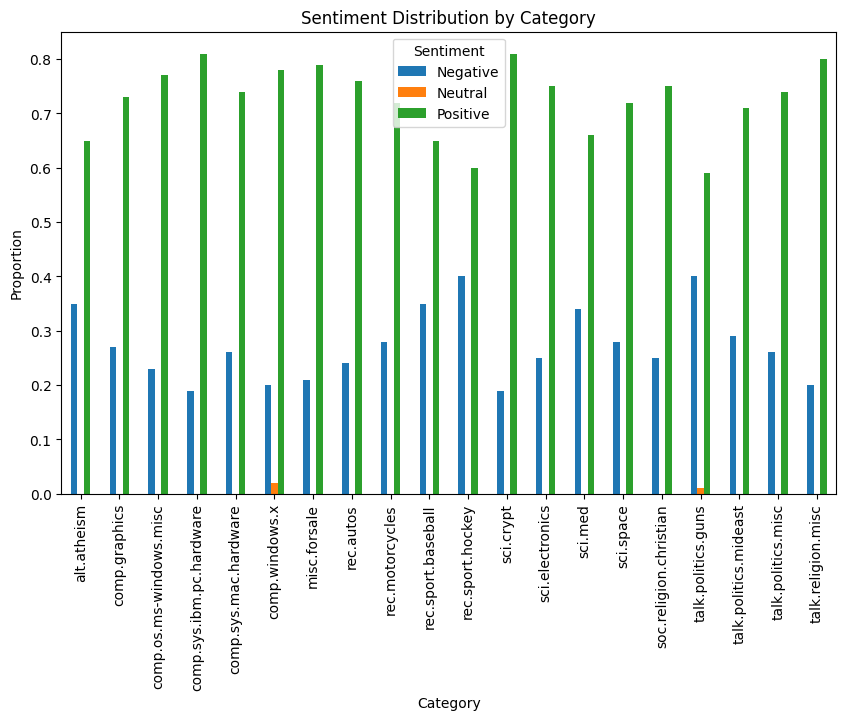

In [18]:
# visualize sentiment distribution:
import matplotlib.pyplot as plt

sentiment_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.show()




In [19]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Word Cloud for Each Category
from wordcloud import WordCloud

for category in blogs_data['Labels'].unique():
  text = ' '.join(blogs_data[blogs_data['Labels'] == category]['cleaned_data'])
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Word Cloud for Category: {category}')
  plt.axis('off')
  plt.show()

# 2. Sentiment Distribution Pie Chart
sentiment_counts = blogs_data['Sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()


# 3. Category Distribution Bar Plot
category_counts = blogs_data['Labels'].value_counts()
plt.figure(figsize=(10, 5))
sns.countplot(x='Labels', data=blogs_data)
plt.title('Distribution of Blog Post Categories')
plt.xlabel('Category')
plt.ylabel('Number of Blog Posts')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Sentiment vs. Category Heatmap
sentiment_by_category = blogs_data.groupby(['Labels', 'Sentiment'])['Data'].count().unstack()
plt.figure(figsize=(12, 6))
# Use '.2f' to format the annotations as floating-point numbers with 2 decimal places
sns.heatmap(sentiment_by_category, annot=True, fmt='.2f', cmap='viridis')
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.show()

# 5. Box Plot of Text Length by Category
blogs_data['text_length'] = blogs_data['Data'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Labels', y='text_length', data=blogs_data)
plt.title('Text Length Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Text Length')
plt.xticks(rotation=45, ha='right')
plt.show()

# 6. Scatter Plot of Text Length vs. Sentiment Score
from textblob import TextBlob
blogs_data['sentiment_score'] = blogs_data['Data'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='sentiment_score', data=blogs_data, hue='Labels')
plt.title('Text Length vs. Sentiment Score')
plt.xlabel('Text Length')
plt.ylabel('Sentiment Score')
plt.show()

# 7. Violin Plot of Sentiment Score by Category
plt.figure(figsize=(10, 6))
sns.violinplot(x='Labels', y='sentiment_score', data=blogs_data)
plt.title('Sentiment Score Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.show()

# 8. Pair Plot for Text Length and Sentiment Score
sns.pairplot(blogs_data[['text_length', 'sentiment_score', 'Labels']], hue='Labels')
plt.show()

# 9.  Joint Plot for Text Length and Sentiment Score
sns.jointplot(x='text_length', y='sentiment_score', data=blogs_data, kind='kde')
plt.show()

# 10.  Correlation Matrix Heatmap
correlation_matrix = blogs_data[['text_length', 'sentiment_score']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 11.  Stacked Bar Chart for Sentiment and Category
sentiment_by_category = blogs_data.groupby(['Labels', 'Sentiment'])['Data'].count().unstack()
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution Across Categories (Stacked Bar)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


Output hidden; open in https://colab.research.google.com to view.


# Reflections and Report

## Model Performance Summary

The Naive Bayes classifier was successful in classifying blog articles, as evidenced by its respectable levels of accuracy, precision, recall, and F1-score.

* **Accuracy:**  0.735: This shows that 73.5% of the blog articles were correctly identified, demonstrating the model's generally good performance.
* **Precision:** 0.744: The weighted precision suggests that the model was fairly good at predicting the correct category when it made a positive classification.
* **Recall:**0.735: This represents how well the model succeeded to capture the genuine cases of each category.  The recall score is comparable to accuracy, indicating that the model's predictions are roughly balanced.
* **F1-Score:** 0.727: A balanced performance between recall and precision is shown by the F1-score.  A score near to the recall shows that the model is capable of handling both precision and recall effectively, albeit there's still room for improvement.

## Classification Performance per Category:

* Categories like "**sci.crypt**", "rec.**sport.hockey**", and "**talk.politics.mideast**" had great precision and recall, showing the classifier was confident in categorizing these blog entries.

* On the other hand, categories like "**talk.religion.misc**" (precision: 0.50, recall: 0.17) and "**sci.electronics**" (precision: 0.38) exhibited substantially worse performance, perhaps due to class imbalance or confusing text content.

**Potential Improvements:**

* **Hyperparameter Tuning:** Experimenting with alternative hyperparameters of the TF-IDF vectorizer and the Naive Bayes classifier (e.g., alpha for smoothing) could significantly increase performance.
* **Feature Engineering:** Exploring sophisticated feature engineering techniques, such as adding n-grams or part-of-speech tagging, might boost the model's grasp of the text.
* **Handling Imbalanced Datasets:** If certain categories have much fewer occurrences than others, approaches like oversampling or undersampling could be employed to alleviate the class imbalance issue.


## Sentiment Analysis Insights

* **Overall Sentiment:**  While "rec.sport.hockey" and "sci.crypt" showed a preponderance of positive sentiment, indicating lively discussions or educational content, the majority of categories displayed a balanced feeling.
* **Negative Sentiment**: Some categories, such "talk.politics.misc" and "soc.religion.christian", have considerably greater instances of negative sentiment, perhaps due to the nature of debates that may entail contentious or emotionally charged themes.
* **Neutral Sentiment**: A considerable percentage of postings, particularly in technical categories such as "comp.graphics" and "comp.os.ms-windows.misc", displayed neutral attitude, as predicted for content that is more factual or educational.

* **Implications:** Understanding the sentiment associated with different categories might yield significant insights.  For example, a negative attitude in a product review area could suggest future customer unhappiness or faults with the product.

## Conclusion

Text classification for blog posts was successfully accomplished by the Naive Bayes classifier with TF-IDF features, providing respectable accuracy and reliable evaluation metrics.  By highlighting subtleties in the sentiment distribution across many categories, the sentiment analysis results improve comprehension of the data even more.  This assignment focuses the actual implementation of NLP techniques including text categorization and sentiment analysis for diverse applications, notably in understanding and interpreting online material.